# HW 4: Heuristically Optimized Trade-offs (HOT) Based Models

## Task 1:
### In this task you are supposed to generate a network based on a simple optimization criteria: Each newly added node ($i$) which has a uniformly random position $(x,y)$ on the unit square, takes into account its distance ($d_{ij}$) to other nodes ($j<i$) as well as the hop count ($h_j$) from that node to a central node in the network to decide which node to connect. The node to connect to is chosen as follows:
### $$node = argmin_{j<i} \   \alpha d_{ij} + h_j $$
### Here $ \alpha $ is a parameter gauging the relative importance of the two objectives.
### You are supposed to:
### -- Generate a network with $n=500$ nodes based on the above optimization model with $\alpha = 5$. Here, choose the first node as the central node.
### -- Visualize the network using NetworkX built-in visulization method which can take into account the position of each node on the plane as well (nx.draw()). Make sure to highlight the central node with a different color using nx.draw_networkx_nodes().
### -- Plot the degree distribution and decide whether it is close to a Binomial, Exponential, or Power law distribution.
### -- Repeat the task for $\alpha = 1,10,100 $ and compare the results.

In [28]:
# Importing Libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import warnings
import sys
warnings.filterwarnings('ignore')

In [175]:
## The function for deriving and plotting the degree distribution and its normalized version on arithmetic and loglog scale

def plot_deg_dist(g1):
    
    # Your code here
    node, edge=g1.order(),g1.size()
    deg=g1.degree()
    d=list(np.zeros((node), dtype=np.int))
    temp=list(np.zeros((node), dtype=np.int))
    for k in range (node):
        d[k]= deg[k]
    for k in range (node):
        temp[k]=k
    degList=dict(zip(temp,d))
    for k in g1.nodes():
        g1.node[k]['deg'] = degList[k]
    deg_values = sorted(set(degList.values()))
    deg_hist = [degList.values().count(x) for x in deg_values]
    plt.figure()
    plt.grid(True)
    plt.loglog(deg_values, deg_hist) #degree  
    plt.xlabel('Degree')
    plt.ylabel('Number of nodes')
    plt.title('HOT Degree Distribution - LogLog scale')
    plt.xlim([0, max(degList.values())])
    plt.show()
    plt.close()
    
    plt.figure()
    plt.grid(True)
    plt.plot(deg_values, deg_hist) #degree  
    plt.xlabel('Degree')
    plt.ylabel('Number of nodes')
    plt.title('HOT Degree Distribution - Decimal scale')
    plt.xlim([0, max(degList.values())])
    plt.show()
    plt.close()

In [192]:
## The function that generates and outputs a HOT graph with n nodes and parameter alpha

def make_HOT_graph(n,alpha):
    
    # Your code here
    G=nx.Graph()
    central = np.random.uniform(0,1,2)
    count=0
    G.add_node(count,pos=central)
    
    for i in xrange(n-1):
        newnode = np.random.uniform(0,1,2)
        conndist=sys.maxint
        connect=0
        for j in G.node:
            temp=alpha*1.0*np.linalg.norm(G.node[j]['pos']-newnode)+nx.shortest_path_length(G,source=0,target=j)
            if temp<conndist:
                conndist=temp
                connect=j
        count+=1
        G.add_node(count,pos=newnode)
        G.add_edge(connect,count)
    return G   

In [186]:
def plot_graph(G,alpha):   
    pos=nx.get_node_attributes(G,'pos')
    nodesize=[500]
    nodesize.extend([50]*499)

    nodecolor=['b']
    nodecolor.extend(['r']*499)
    
    plt.figure(figsize=(10,10))
    plt.grid(True)
    nx.draw_networkx_nodes(G,pos=pos,nodelist=G.nodes(),node_size=nodesize,node_color=nodecolor)
    nx.draw_networkx_edges(G,pos)
    plt.title('HOT network for alpha : '+str(alpha))
    plt.show()
    plt.close()

In [187]:
def genGraph(n,alpha):
    G=make_HOT_graph(n,alpha)
    plot_graph(G,alpha)
    plot_deg_dist(G)

# For $\alpha=5$

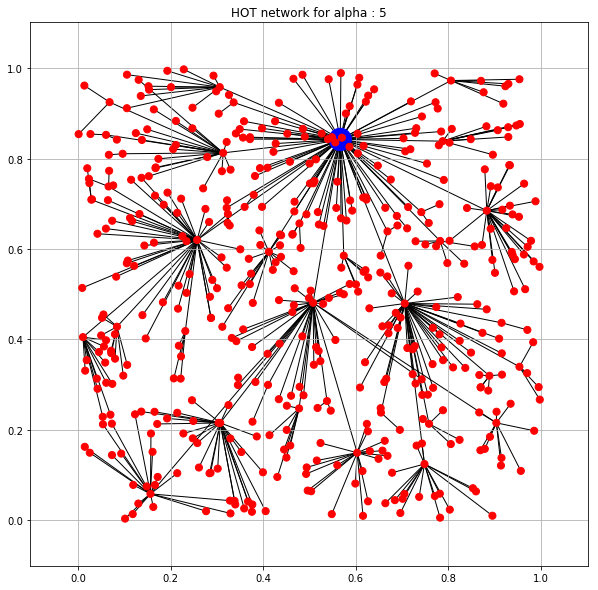

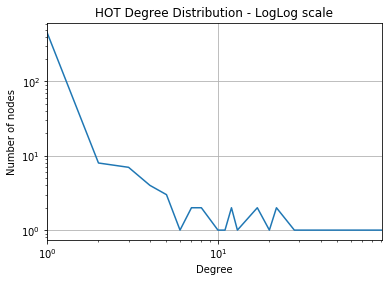

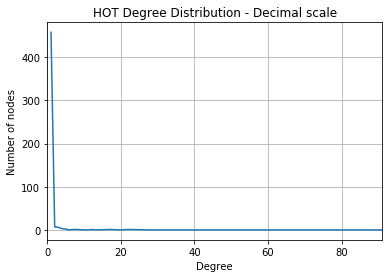

In [193]:
# Generate networks with all the given parameters and respond to all of the tasks in the problem statements.
# Your code here
genGraph(500,5)

### For $\alpha = 5$, we can see that it produces an exponential distribution 

# For $\alpha=1$

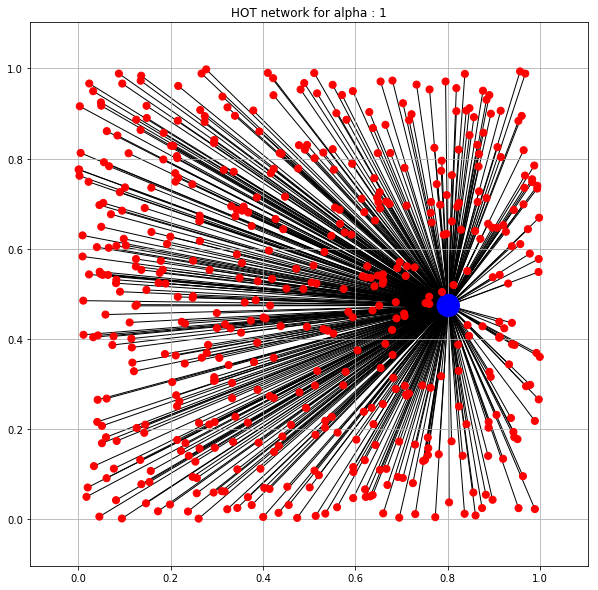

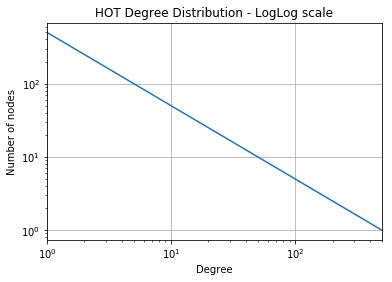

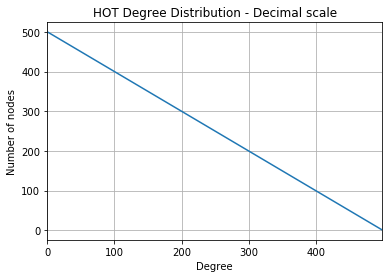

In [196]:
genGraph(500,1)

### For $\alpha = 1$, even though $\alpha > 1/\sqrt 2$, we can see that the HOT produces a near-star graph, and a Bernoulli distribution.

# For $\alpha=10$

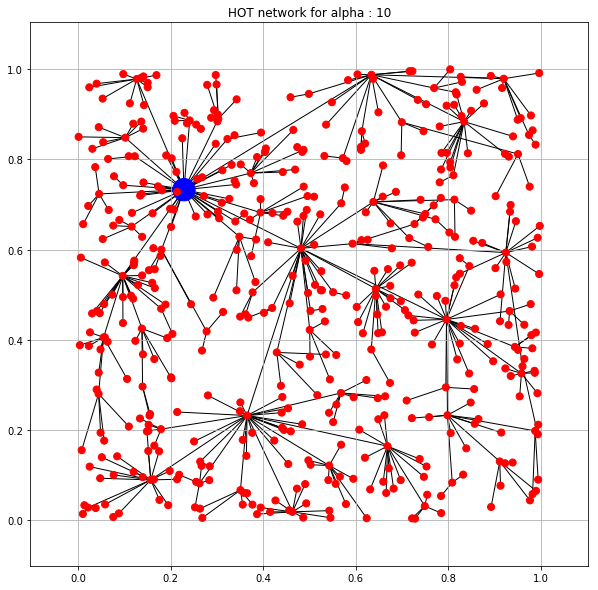

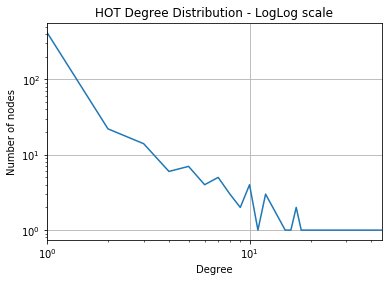

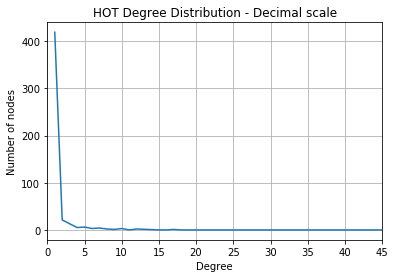

In [190]:
genGraph(500,10)

### For $\alpha = 10$, we can see that the HOT produces an exponential distribution, as $\alpha = \Omega(\sqrt n)$

# For $\alpha=100$

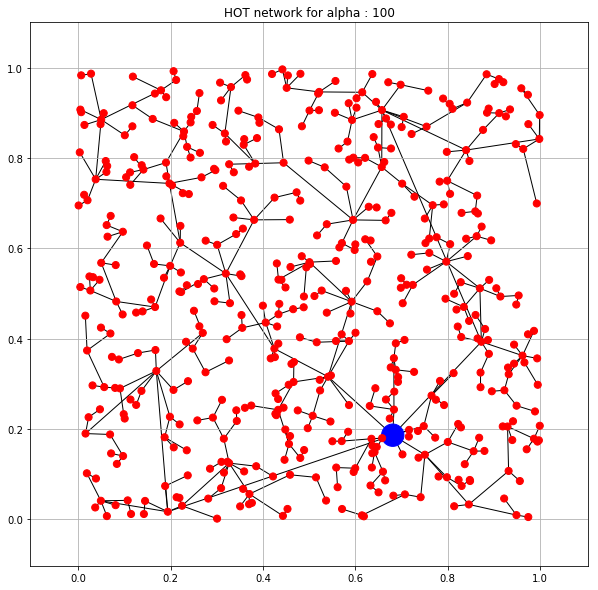

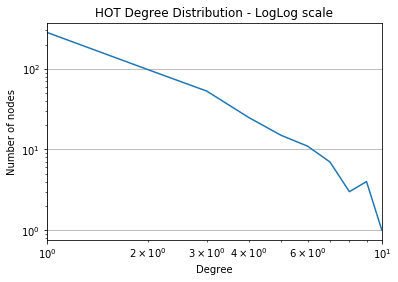

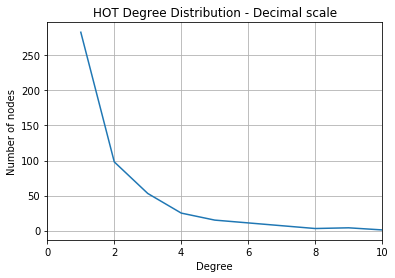

In [191]:
genGraph(500,100)

### For $\alpha = 100$, we can see that the HOT produces a power law distribution, as $ \alpha>4$ and $\alpha = o(\sqrt n)$

## As per the HOT theory we can see that the HOT produces a star network with Bernoulli degree distribution for very less $\alpha$, an exponential distribution for medium $\alpha$ and a power-law distribution for large $\alpha$

## Task 2:
### In this task you are given a core network inspired by an actual infrastructure and you are supposed to connect random nodes to the nodes of this core network according to a power law. Then you are supposed to calculate a performance measure for this network. 
### Then, you are supposed to create a preferential attachment random graph based on the Barabasi-Albert model with the same number of nodes and compare the perfomance measure of this network to the first network. 
### Create the following graph in NetworkX.

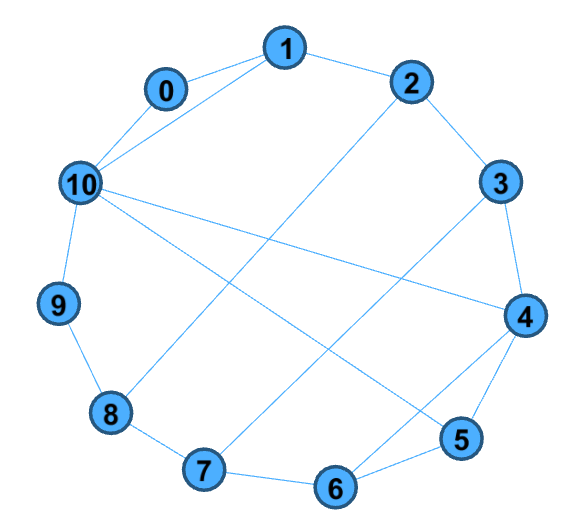

In [331]:
# Your code here
g=nx.Graph()
g.add_edges_from([(0,1),(1,2),(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,10),(10,0),(10,1),(10,4),(10,5),(2,8),(3,7),(4,6)])

### To each node of the above core network connect random number of new nodes according to a power law distribution with mean 10 and $\alpha = 3$. 
### For mean=10 and $\alpha = 3$, on solving we get A=60/$\pi^2$, and $x_{min}$=$\sqrt 30/\pi$

In [270]:
import powerlaw
import math

In [342]:
# Your code here
theoretical_distribution = powerlaw.Power_Law(xmin=math.sqrt(30)/math.pi, parameters=[3], discrete=True)
simulated_data = theoretical_distribution.generate_random(11, estimate_discrete=True)
print simulated_data

[  2.  15.   3.  19.   2.   4.   4.   5.   3.   4.  17.]


In [343]:
count=11
for node in xrange(11):
    num = int(simulated_data[node])
    for i in xrange(num):
        g.add_edge(node,count)
        count+=1

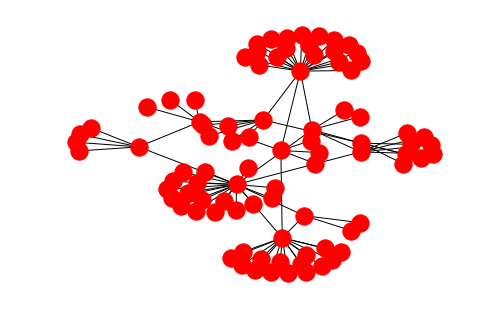

In [347]:
nx.draw(g)
plt.show()

In [350]:
nx.write_gml(g,'hw4_co.gml')

### Visualize the resulted graph using gephi and include the visualization in your notebook.

# <img src="images/hw4.png">

### For each pair of the newly added nodes perform shortest path routing using NetworkX and create a binary matrix $R$ such that each row of the matrix correspond to a core node and each column correspond to an ordered pair of newly added nodes. Each element of this matrix is "one" if the shortest path between the corresponding pair goes through the corresponding core node and "zero" otherwise. This matrix is sometimes called the routing matrix.


In [365]:
# Your code here
row=11
core=11
noncore=int(sum(simulated_data))
col=noncore*(noncore-1)
R=np.zeros((row,col))

In [367]:
colcount = 0
for i in range(core,core+noncore):
    for j in xrange(core,core+noncore):
        if i==j:
            continue
        path=nx.shortest_path(g,source=i,target=j)
        for k in xrange(core):
            if k in path:
                R[k,colcount]=1
        colcount+=1

### Find the solution of the following linear programming using $cvxpy$ library:
### $$ Maximize \sum X_{i,j} $$
### $$ s.t. \ \ X_{i,j} \ge 0 , RX\le B  $$

### Here, $B$ is a vector containing the maximum bandwidth of each of the core nodes. In this homework assume that all the elements of this vector are set to 10.

In [372]:
# !pip install cvxpy
from cvxpy import *

In [492]:
# Your code here
B = np.ones((core,1))*10
# Construct the problem.
x = Variable(col)
constraints = [x>0,R*x <= B]
objective = Maximize(sum(x))
prob = Problem(objective, constraints)
result = prob.solve()

In [537]:
print x.value

[[  5.00000000e+00]
 [  1.22634004e-12]
 [  1.22634004e-12]
 ..., 
 [  3.67647058e-02]
 [  3.67647058e-02]
 [  3.67647058e-02]]


In [493]:
print "The optimized maximum flow is ",result

The optimized maximum flow is  110.000000008


### Now create a Barabasi-Albert random graph with the same number of nodes as the previous graph and $m=1$ and visualize it using Gephi.

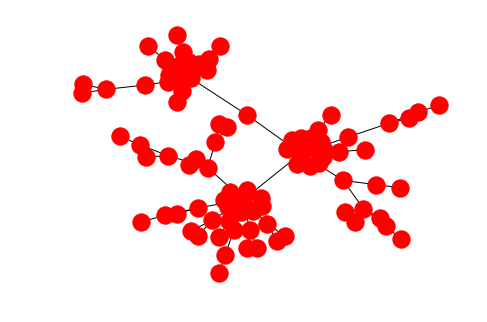

In [447]:
# Your code here
gb = nx.barabasi_albert_graph(g.order(), m=1)   
nx.draw(gb)
plt.show()

In [448]:
nx.write_gml(gb,'barabasi_albert_graph.gml')

# The Barabasi Albert graph
# <img src="images/ba_graph.png"> 

### Calculate the routing matrix for this random graph with the first 11 nodes as the core. (Ignore the pairs whose shortest path does not go through the core.)

In [523]:
row1=11
core1=11
noncore1=gb.order()-11
col1=0

for i in range(core1,core1+noncore1):
    for j in xrange(core1,core1+noncore1):
        if i==j:
            continue
        path=nx.shortest_path(gb,source=i,target=j)
        for k in xrange(core1):
            if k in path:
                col1+=1    
                break

### col1 indicates the #columns of the R matrix, since we ignore the pairs whose shortest path does not go through the core

In [530]:
# Your code here
# Your code here
row1=11
core1=11
noncore1=gb.order()-11
R1=np.zeros((row1,col1))

colcount1 = 0
for i in range(core1,core1+noncore1):
    for j in xrange(core1,core1+noncore1):
        if i==j:
            continue
        path=nx.shortest_path(gb,source=i,target=j)
        flag=0
        for k in xrange(core1):
            if k in path:
                flag=1
                break
        if flag:
            for k in xrange(core1):
                if k in path:
                    R1[k,colcount1]=1
            colcount1+=1

### Now solve the previous optimization problem for this random graph and compare the result with the previous result. Which network has a higher performance?

In [533]:
# Your code here
# Your code here
B1 = np.ones((core1,1))*10
# Construct the problem.
x1 = Variable(col1)

In [534]:
constraints1 = [x1>0,R1*x1 <= B1]
objective1 = Maximize(sum(x1))
prob1 = Problem(objective1, constraints1)
result1 = prob1.solve()    

In [538]:
print "The optimized maximum flow for the Barabasi Albert graph is : ",result1

The optimized maximum flow for the Barabasi Albert graph is :  70.0000000011


In [536]:
print x1.value

[[  8.09061489e-03]
 [  1.30482485e-12]
 [  1.03624916e-12]
 ..., 
 [  8.09061489e-03]
 [ -9.99328384e-13]
 [ -9.99328384e-13]]


# Thus we can see that the graph developed by using a power law with a constrained optimization (HOT) has a better performance than a random Barabasi Albert graph, as the former incorporates real world engineering knowledge into its model.